<a href="https://colab.research.google.com/github/tsungchi-source/HW/blob/main/0910_%E5%9C%A8%E8%81%B7%E5%B0%88%E7%8F%AD_week1_%E7%88%AC%E3%80%8C%E5%8F%B0%E9%81%94%E9%9B%BB2308%E3%80%8D%E8%82%A1%E5%83%B9_%E5%8A%89%E5%AE%97%E6%97%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 股市資料蒐集、爬蟲



## 取得證交所資料
1. 進入證交所網址：https://www.twse.com.tw/zh/index.html
2. 使用開發者模式取得請求資料網址

### 匯入套件

In [ ]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

### 取得證交所上市公司個股日成交資訊

In [ ]:
# "台達電"股票代號
stock_id = '2308'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = 20241101

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2308
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20250913


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/09/01,"14,583,681","10,134,452,900",706.00,724.00,678.00,688.00,-23.00,"34,518"
1,114/09/02,"11,619,304","8,017,322,759",698.00,704.00,678.00,685.00,-3.00,"19,347"
2,114/09/03,"12,034,963","8,183,535,307",683.00,687.00,675.00,680.00,-5.00,"18,299"
3,114/09/04,"10,307,064","7,166,082,395",689.00,705.00,685.00,691.00,+11.00,"15,829"
4,114/09/05,"15,305,812","11,016,077,981",720.00,726.00,711.00,726.00,+35.00,"24,123"
5,114/09/08,"11,437,223","8,388,082,317",745.00,745.00,726.00,726.00,0.00,"19,884"
6,114/09/09,"21,560,823","16,709,779,631",729.00,798.00,728.00,784.00,+58.00,"40,716"
7,114/09/10,"23,938,193","19,809,250,430",807.00,844.00,806.00,837.00,+53.00,"44,056"
8,114/09/11,"27,598,193","23,101,946,092",825.00,853.00,825.00,831.00,-6.00,"46,947"
9,114/09/12,"20,358,692","17,123,909,344",834.00,854.00,834.00,837.00,+6.00,"27,872"


### 抓取特定某段時間區間 114/9/01~114/9/12
為了比較時間區間，必須要把「日期」欄位轉圜為 Pandas 中的 datetime 格式

In [ ]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/09/01'
end_date = '2025/09/12'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

          日期        成交股數            成交金額     開盤價     最高價     最低價     收盤價  \
0 2025-09-01  14,583,681  10,134,452,900  706.00  724.00  678.00  688.00   
1 2025-09-02  11,619,304   8,017,322,759  698.00  704.00  678.00  685.00   
2 2025-09-03  12,034,963   8,183,535,307  683.00  687.00  675.00  680.00   
3 2025-09-04  10,307,064   7,166,082,395  689.00  705.00  685.00  691.00   
4 2025-09-05  15,305,812  11,016,077,981  720.00  726.00  711.00  726.00   
5 2025-09-08  11,437,223   8,388,082,317  745.00  745.00  726.00  726.00   
6 2025-09-09  21,560,823  16,709,779,631  729.00  798.00  728.00  784.00   
7 2025-09-10  23,938,193  19,809,250,430  807.00  844.00  806.00  837.00   
8 2025-09-11  27,598,193  23,101,946,092  825.00  853.00  825.00  831.00   
9 2025-09-12  20,358,692  17,123,909,344  834.00  854.00  834.00  837.00   

     漲跌價差    成交筆數  
0  -23.00  34,518  
1   -3.00  19,347  
2   -5.00  18,299  
3  +11.00  15,829  
4  +35.00  24,123  
5    0.00  19,884  
6  +58.00  40,716  
7  

### 取得連續月份資料
以個股本益比為例

In [ ]:
# 設定查找時間
date_list = ['20250701', '20250801', '20250901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比  股價淨值比  財報年/季
0   114年07月01日   1.64   113  28.01   4.54  114/1
1   114年07月02日   1.63   113  28.11   4.55  114/1
2   114年07月03日   1.53   113  30.04   4.87  114/1
3   114年07月04日   1.53   113  29.91   4.85  114/1
4   114年07月07日   1.56   113  29.45   4.77  114/1
5   114年07月08日   1.55   113  29.55   4.79  114/1
6   114年07月09日   1.55   113  29.52   4.78  114/1
7   114年07月10日   1.45   113  31.58   5.12  114/1
8   114年07月11日   1.45   113  31.61   5.12  114/1
9   114年07月14日   1.48   113  30.96   5.02  114/1
10  114年07月15日   1.42   113  32.33   5.24  114/1
11  114年07月16日   1.40   113  32.72   5.30  114/1
12  114年07月17日   1.40   113  32.66   5.29  114/1
13  114年07月18日   1.38   113  33.31   5.40  114/1
14  114年07月21日   1.36   113  33.70   5.46  114/1
15  114年07月22日   1.36   113  33.57   5.44  114/1
16  114年07月23日   1.35   113  34.03   5.51  114/1
17  114年07月24日   1.35   113  33.90   5.49  114/1
18  114年07月25日   1.35   113  33.84   5.48  114/1
19  114年07月28日   1.3

## 使用 Yahoo Finance 取得資料

###匯入套件

In [ ]:
!pip install yfinance

In [ ]:
# yahoo finance 套件
import yfinance as yf
# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [ ]:
# 輸入股票代號
stock_id = "2308.tw"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取一年資料（現在-過去365天）
start = end - dt.timedelta(days=365)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-2703882378.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-13,378.270905,385.639818,375.323339,385.639818,4663800
1,2024-09-16,378.762177,382.201003,374.340828,378.270916,3624545
2,2024-09-18,373.358307,378.270916,369.919480,374.340829,6556263
3,2024-09-19,384.657288,384.657288,375.814591,375.814591,7207787
4,2024-09-20,380.235962,390.552442,380.235962,388.096137,9136601
...,...,...,...,...,...,...
237,2025-09-08,726.000000,745.000000,726.000000,745.000000,11029416
238,2025-09-09,784.000000,798.000000,728.000000,729.000000,20739103
239,2025-09-10,837.000000,844.000000,806.000000,807.000000,22858768
240,2025-09-11,831.000000,853.000000,825.000000,825.000000,25892416


# <b>資料可視化</b>

## 可視化收盤價折線圖

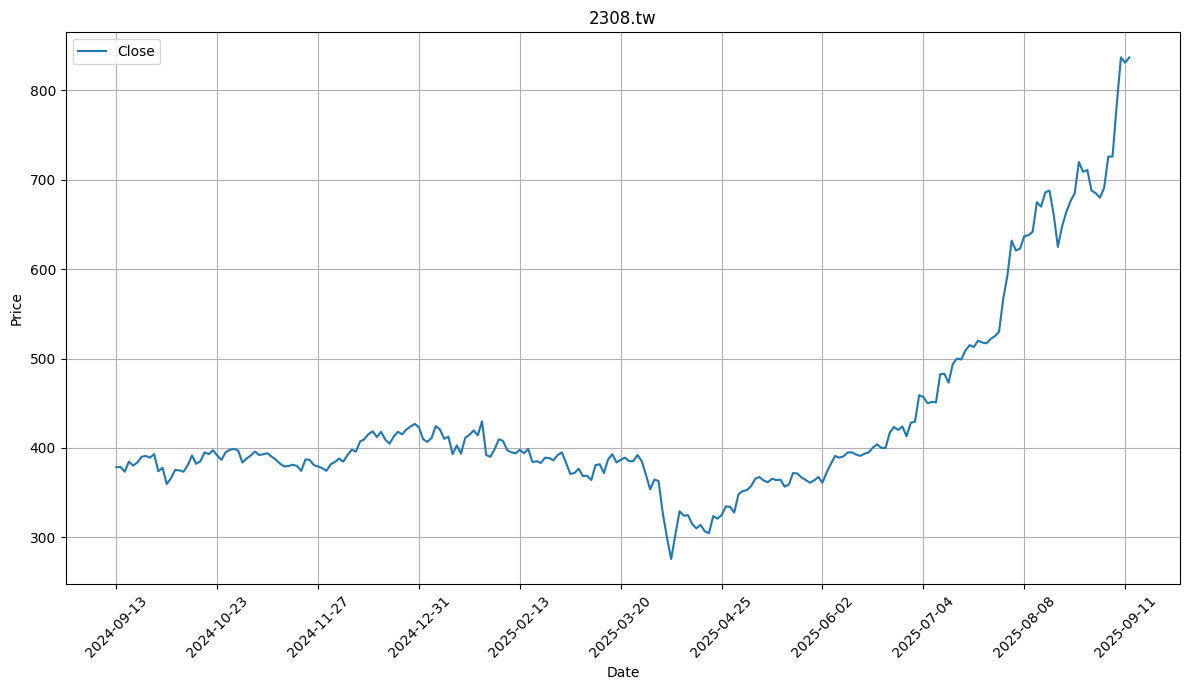

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 用 BeautifulSoup4 取得 Yahoo 股市資料

### ⚠️ 如果過度頻繁爬取證交所的資料(約連續50次)會被偵測並封鎖IP，可以搭配time、sleep延遲回應避免被認為是機器人程式。

###匯入套件

In [ ]:
# 用來處理時間
from datetime import datetime, timedelta
# 解析網頁內容
from bs4 import BeautifulSoup

### 取得股價資料

In [ ]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# "台達電"股票代號
stock_id = '2308'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2025/09/12 14:30,2308,837,834,854,834,841,162.08,831,0.72%,6.00,"19,271","25,876",2.41%


###取得季報表資訊


In [ ]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2308', 'income-statement']
income-statement


In [ ]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

      年度/季別       營業現金流        投資現金流        融資現金流       自由現金流        淨現金流
0   2025 Q2  27,326,968  -10,405,486    2,555,522  16,921,482    -763,128
1   2025 Q1  16,266,606  -11,843,464   14,638,384   4,423,142  22,831,846
2   2024 Q4  21,704,181  -13,322,279  -14,646,675   8,381,902  -2,985,565
3   2024 Q3  19,264,867   -6,849,073    2,042,340  12,415,794  14,877,438
4   2024 Q2  16,867,817   -7,899,282   -1,714,776   8,968,535   8,350,710
5   2024 Q1  15,058,092  -12,289,389    3,201,529   2,768,703   9,760,751
6   2023 Q4  24,423,925   -6,155,321    4,047,965  18,268,604  17,449,411
7   2023 Q3  15,234,006  -14,061,750  -10,813,119   1,172,256  -5,362,844
8   2023 Q2  15,108,725   -6,379,350   -2,454,653   8,729,375   6,176,428
9   2023 Q1  16,319,757   -6,905,272   -1,258,255   9,414,485   7,646,085
10  2022 Q4  16,356,247   -6,326,517  -12,205,478  10,029,730  -3,394,516
11  2022 Q3  11,780,205   -8,369,956   -5,454,777   3,410,249   3,892,614
12  2022 Q2  11,397,315   -5,515,490  